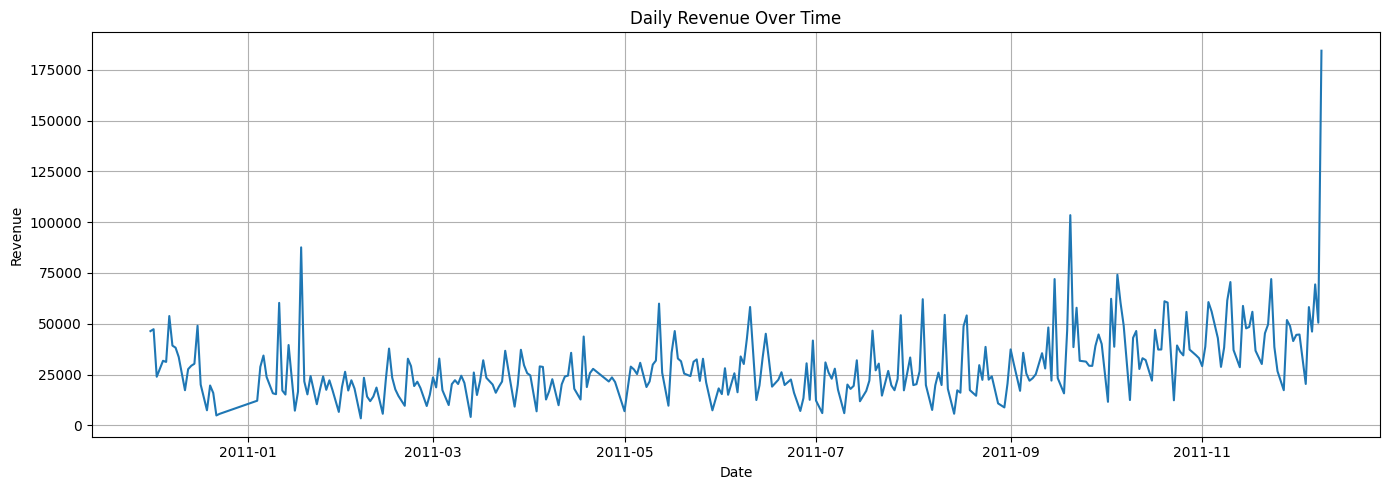

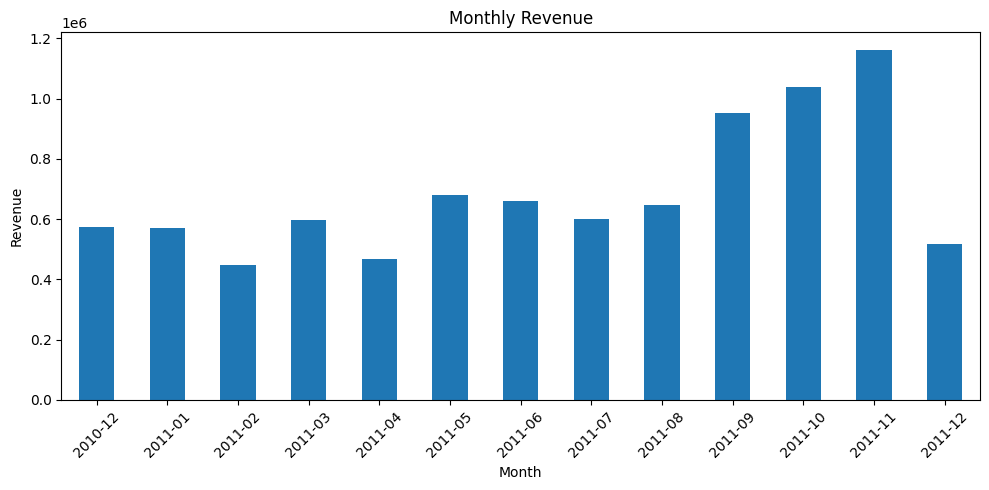

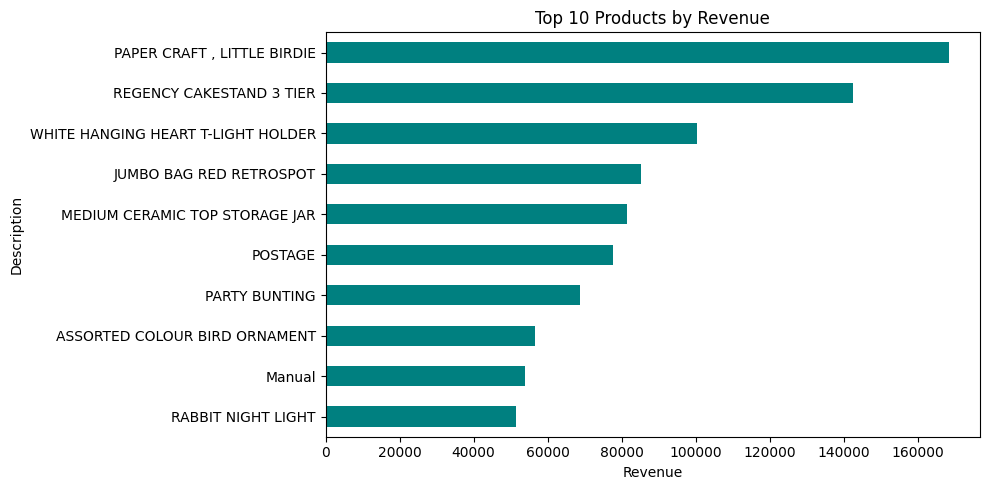

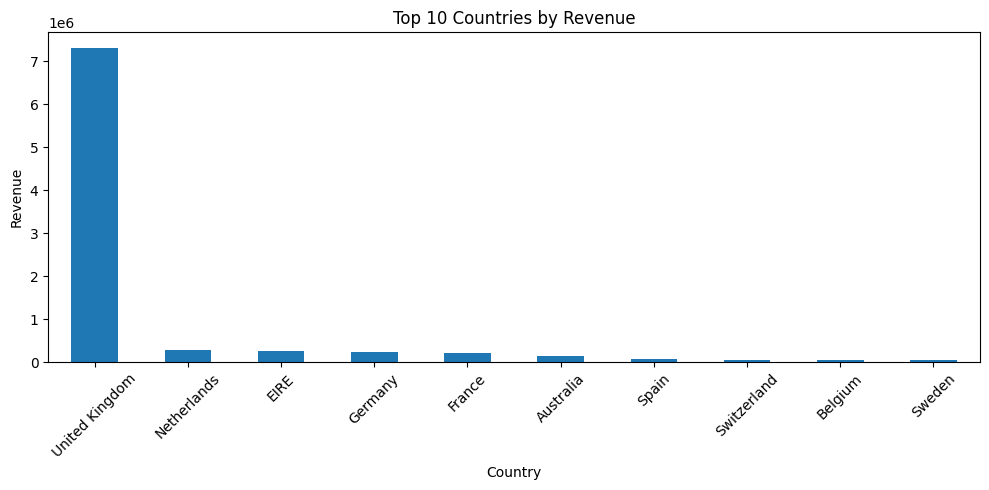

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load from your SQLite DB
conn = sqlite3.connect('ecommerce_sales.db')
df = pd.read_sql_query("SELECT * FROM sales", conn)

# Convert InvoiceDate to datetime (if needed)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create additional time fields
df['Date'] = df['InvoiceDate'].dt.date
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# -------------------------------
# Revenue Over Time (Daily)
# -------------------------------
daily_revenue = df.groupby('Date')['TotalPrice'].sum()

plt.figure(figsize=(14,5))
daily_revenue.plot()
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# Monthly Revenue
# -------------------------------
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='bar')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# Top 10 Products by Revenue
# -------------------------------
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='barh', color='teal')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -------------------------------
# Revenue by Country
# -------------------------------
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

